In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

In [2]:
# Load dataset
data = pd.read_csv('uber.csv')

In [3]:
data.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
data.shape

(200000, 9)

In [5]:
# Drop irrelevant columns
data = data.drop(columns=["Unnamed: 0", "key"])

In [6]:
data.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [7]:
# Drop rows with missing values
data = data.dropna()

In [8]:
data.shape

(199999, 7)

In [9]:
# Convert datetime
data["pickup_datetime"] = pd.to_datetime(data["pickup_datetime"], errors="coerce")
data["hour"] = data["pickup_datetime"].dt.hour
data["day"] = data["pickup_datetime"].dt.day
data["month"] = data["pickup_datetime"].dt.month
data["weekday"] = data["pickup_datetime"].dt.weekday
data = data.drop(columns=["pickup_datetime"])

In [10]:
# Haversine distance
def haversine(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return 6371 * c

In [11]:
data["distance_km"] = haversine(
    data["pickup_latitude"], data["pickup_longitude"],
    data["dropoff_latitude"], data["dropoff_longitude"]
)

In [12]:
# Remove unrealistic values
data = data[(data["fare_amount"] > 0) & (data["fare_amount"] < 200)]
data = data[(data["distance_km"] > 0) & (data["distance_km"] < 100)]
data = data[(data["passenger_count"] > 0) & (data["passenger_count"] < 7)]

In [13]:
X = data[["distance_km", "passenger_count", "hour", "day", "month", "weekday"]]
y = data["fare_amount"]

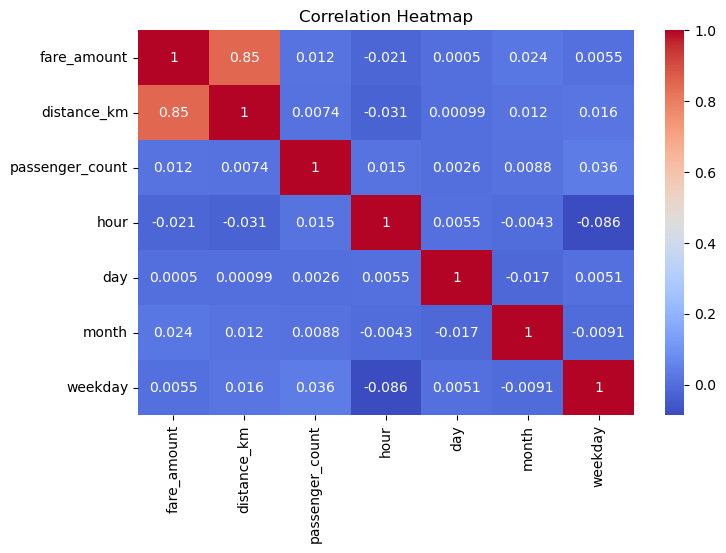

In [14]:
# Correlation Heatmap
plt.figure(figsize=(8,5))
sns.heatmap(data[["fare_amount","distance_km","passenger_count","hour","day","month","weekday"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Linear Regression

In [17]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred_lin = lin_reg.predict(X_test_scaled)

In [18]:
print("\n--- Linear Regression ---")
print("R2 Score:", r2_score(y_test, y_pred_lin))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lin)))


--- Linear Regression ---
R2 Score: 0.7251567240961213
RMSE: 5.023900658752837


## Ridge Regression

In [19]:
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_reg.predict(X_test_scaled)

print("\n--- Ridge Regression ---")
print("R2 Score:", r2_score(y_test, y_pred_ridge))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))


--- Ridge Regression ---
R2 Score: 0.7251566597644097
RMSE: 5.023901246717212


## Lasso Regression 

In [20]:
lasso_reg = Lasso(alpha=0.01)
lasso_reg.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_reg.predict(X_test_scaled)

print("\n--- Lasso Regression ---")
print("R2 Score:", r2_score(y_test, y_pred_lasso))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))



--- Lasso Regression ---
R2 Score: 0.7251345730234455
RMSE: 5.024103106031337
